In [ ]:
#population - 100,000
# men - 70%
# women - 30 %
# give everyone a rating between 1-10
# matching algorithm -> every day, men can pick up random 20 women and if they're in +-2 of their score it's a match (issues with this )
# same for women, random 20 men -> +-2 then it's a match
# can allow multiple matches for each person
# check after say 2 weeks



# ideas 
# rating slightly skewed towards 6 7 8
# matching algorithm - maybe on a grid idk
# matching critieria, give women +-1 or lesser matches idk
# realised something  doesnt make sense, a man rated 10 has zero matches as he got matched with a 3, need to think about a better way on how to do match


#To Do 
#figure out if we can do some homosexual modeling 
  # % of straight, lesbian/gay women/men and then bisexual (for bisexual would also need some % of who they're into)

In [33]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


In [1]:
population = 100000
male_percent = int(0.75 * population)
women_percent = int(0.25 * population)
matches_per_day_men = 20
matches_per_day_women = 20
number_of_days = 5
matching_criteria_for_men = 2
matching_criteria_for_women = 2
matching_criteria = min(matching_criteria_for_men,matching_criteria_for_women)
#take minimum of matching criteria -> see if women have a +/- 2 


In [4]:
men_population = male_percent * population
women_population = women_percent * population 
men_ratings =  [0] * men_population
  #making a list where we store the ratings of men, randomly generate from 1-10
for i in range(len(men_ratings)):
  men_ratings[i] = generate_random_rating()

women_ratings = [0] * women_population
for i in range(len(women_ratings)):
  women_ratings[i] = generate_random_rating()


men_matches_count = [0] * men_population
women_matches_count = [0] * women_population
men_matches_list =   [[] for _ in range((men_population))]
women_matches_list = [[] for _ in range((women_population))]


for k in range(number_of_days):  #14 is like doing this for 14 days 
  for i in range(len(men_matches_count)): #iterate over all men
    current_rating = men_ratings[i] # get current 'rating'
    searching_women = random_match_index(matches_per_day_men,women_population) #get a list containing the index of  women    
    for j in range(len(searching_women)):
    
        #for each of these women, check if the rating is within range for the man in question, if yes call it a match for both (applied check to see they're not already matched)
        ##here we end up using minimum of (men,women) standards
      
      if current_rating - matching_criteria <= women_ratings[searching_women[j]] <= current_rating + matching_criteria and searching_women[j] not in men_matches_list[i] :
        men_matches_count[i] = men_matches_count[i] + 1
        women_matches_count[searching_women[j]] = women_matches_count[searching_women[j]] + 1
        men_matches_list[i].append(searching_women[j])
        women_matches_list[searching_women[j]].append(i)
          
    
  for i in range(len(women_matches_count)):
    current_rating = women_ratings[i]
    searching_men = random_match_index(matches_per_day_women,men_population)

    for j in range(len(searching_men)):
      if current_rating - matching_criteria <= men_ratings[searching_men[j]] <= current_rating + matching_criteria and searching_men[j] not in women_matches_list[i] :
        women_matches_count[i] = women_matches_count[i] + 1
        men_matches_count[searching_men[j]] = men_matches_count[searching_men[j]] + 1
        women_matches_list[i].append(searching_men[j])
        men_matches_list[searching_men[j]].append(i)



MemoryError: 

(0.0, 4520.0)

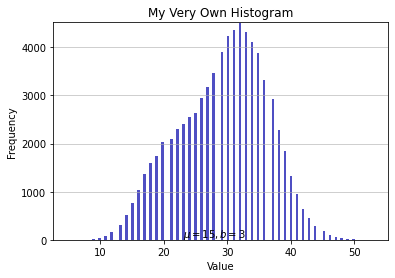

In [70]:
#plotting histograms of data for men


n, bins, patches = plt.hist(x=men_matches_count, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Men Data')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)    


(0.0, 1360.0)

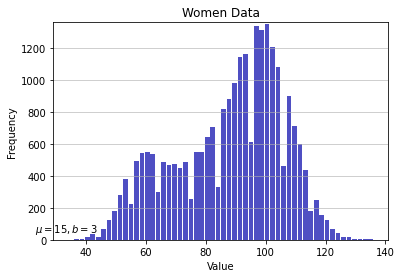

In [71]:
n, bins, patches = plt.hist(x=women_matches_count, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Women Data')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.



0.2656576762257691


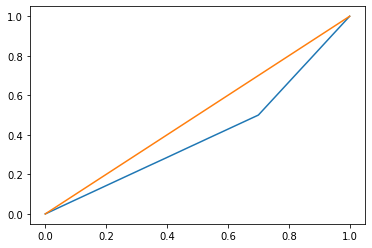

In [78]:
#getting the gini coefficient and lorenz curve to calculate inequality
#reference https://medium.com/@worstonlinedater/tinder-experiments-ii-guys-unless-you-are-really-hot-you-are-probably-better-off-not-wasting-your-2ddf370a6e9a
#note, the maximum gini coefficent obtained till now was 0.25 (70/30 men:women with some other settings i dont remember). real world according to article has 0.50ish


import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
total_matches = men_matches_count+ women_matches_count
total_matches = np.asarray(total_matches,dtype=np.float64)
np.sort(total_matches)


#print(total_matches)

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

print(gini(total_matches))


def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)



lorenz_curve = lorenz(total_matches)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()



In [2]:
#generate random number from 1 to 10
def generate_random_rating():
  return random.randrange(10)+1

#get a list of indexes of either men/mwomen 
def random_match_index(matches_to_be_returned, searching_within):

  match_indexes = [0] * matches_to_be_returned
  for i in range(len(match_indexes)):
    match_indexes[i] = random.randrange(searching_within)
  return match_indexes

In [43]:
a = [1,0,2]
sorted(a)

[0, 1, 2]

In [ ]:
def simulate(
        matches_per_day_men,
        matches_per_day_women,
        number_of_days,
        matching_criteria,
    ):

        men_ratings = [0] * men_population
        # making a list where we store the ratings of men, randomly generate from 1-10
        for i in range(len(men_ratings)):
            men_ratings[i] = generate_random_rating()

        women_ratings = [0] * women_population
        for i in range(len(women_ratings)):
            women_ratings[i] = generate_random_rating()

        men_matches_count = [0] * men_population
        women_matches_count = [0] * women_population
        men_matches_list = [[] for _ in range((men_population))]
        women_matches_list = [[] for _ in range((women_population))]

        for k in range(number_of_days):  # 14 is like doing this for 14 days
            for i in range(len(men_matches_count)):  # iterate over all men
                current_rating = men_ratings[i]  # get current 'rating'
                searching_women = random_match_index(
                    matches_per_day_men, women_population
                )  # get a list containing the index of  women
                for j in range(len(searching_women)):

                    # for each of these women, check if the rating is within range for the man in question, if yes call it a match for both (applied check to see they're not already matched)
                    ##here we end up using minimum of (men,women) standards

                    if (
                        current_rating - matching_criteria
                        <= women_ratings[searching_women[j]]
                        <= current_rating + matching_criteria
                        and searching_women[j] not in men_matches_list[i]
                    ):
                        men_matches_count[i] = men_matches_count[i] + 1
                        women_matches_count[searching_women[j]] = (
                            women_matches_count[searching_women[j]] + 1
                        )
                        men_matches_list[i].append(searching_women[j])
                        women_matches_list[searching_women[j]].append(i)

            for i in range(len(women_matches_count)):
                current_rating = women_ratings[i]
                searching_men = random_match_index(matches_per_day_women, men_population)

                for j in range(len(searching_men)):
                    if (
                        current_rating - matching_criteria
                        <= men_ratings[searching_men[j]]
                        <= current_rating + matching_criteria
                        and searching_men[j] not in women_matches_list[i]
                    ):
                        women_matches_count[i] = women_matches_count[i] + 1
                        men_matches_count[searching_men[j]] = (
                            men_matches_count[searching_men[j]] + 1
                        )
                        women_matches_list[i].append(searching_men[j])
                        men_matches_list[searching_men[j]].append(i)
        return men_matches_count, women_matches_count